In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score, root_mean_squared_error

In [2]:
data=pd.read_csv("1. Regression - Module - (Housing Prices).csv")

In [3]:
data.head(3)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062


In [4]:
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

data cleaning 

In [5]:
data.dropna(subset=["Sale Price","Zipcode"],inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21608 non-null  int64  
 1   Date House was Sold                        21608 non-null  object 
 2   Sale Price                                 21608 non-null  float64
 3   No of Bedrooms                             21608 non-null  int64  
 4   No of Bathrooms                            21604 non-null  float64
 5   Flat Area (in Sqft)                        21599 non-null  float64
 6   Lot Area (in Sqft)                         21599 non-null  float64
 7   No of Floors                               21608 non-null  float64
 8   Waterfront View                            21608 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
data.select_dtypes("float64").columns

Index(['Sale Price', 'No of Bathrooms', 'Flat Area (in Sqft)',
       'Lot Area (in Sqft)', 'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)'],
      dtype='object')

In [9]:
numerical_features=[ 'Flat Area (in Sqft)',
       'Lot Area (in Sqft)', 
       'Area of the House from Basement (in Sqft)', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)']

In [10]:

imputer=SimpleImputer(strategy="mean")

arr=imputer.fit_transform(data[numerical_features])

In [11]:
data[numerical_features]=arr

In [12]:
data["No of Bathrooms"].fillna(method="bfill",inplace=True)

In [13]:
data.drop(columns=["No of Times Visited"],inplace=True)

In [14]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

feature creation 

In [15]:
data["Condition of the House"].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [16]:
def luxary(row):
    count=0
    if row[0]>7:
        count +=1
    if row[1]=="Yes":
        count+=1
    if row[2] in ['Excellent', 'Good']:
        count+=1
    if count>=2:
        return "Yes"
    else:
        return "No"
        
    
    
data["Luxary"]=data[["Overall Grade","Waterfront View","Condition of the House"]].apply(luxary,axis=1)

In [17]:
def year(value):
    return value.split()[-1]

data["Date House was Sold"]=data["Date House was Sold"].map(year)

In [18]:
data.head(3)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Luxary
0,7129300520,2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,No
2,5631500400,2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No


In [19]:
data["Date House was Sold"]=data["Date House was Sold"].astype("int64")

In [20]:
data["Year since renovated"]=np.where(data["Renovated Year"]==0,0,abs(data["Date House was Sold"]-data["Renovated Year"]))

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21608 non-null  int64  
 1   Date House was Sold                        21608 non-null  int64  
 2   Sale Price                                 21608 non-null  float64
 3   No of Bedrooms                             21608 non-null  int64  
 4   No of Bathrooms                            21608 non-null  float64
 5   Flat Area (in Sqft)                        21608 non-null  float64
 6   Lot Area (in Sqft)                         21608 non-null  float64
 7   No of Floors                               21608 non-null  float64
 8   Waterfront View                            21608 non-null  object 
 9   Condition of the House                     21608 non-null  object 
 10  Overall Grade              

checking skewness

In [22]:
zipcode = pd.DataFrame(data.groupby("Zipcode")["Sale Price"].mean().sort_values())
zipcode

,Sale Price
Zipcode,
98002.0,2.342840e+05
98168.0,2.403284e+05
98032.0,2.512962e+05
98001.0,2.808047e+05
98148.0,2.849086e+05
...,...
98102.0,9.015162e+05
98112.0,1.096239e+06
98040.0,1.194874e+06


In [23]:
zipcode["Zipcode"]=pd.cut(zipcode["Sale Price"],bins=10,labels=["zipcode_group_0",
                                                                "zipcode_group_1",
                                                                "zipcode_group_2",
                                                                "zipcode_group_3",
                                                                "zipcode_group_4",
                                                                "zipcode_group_5",
                                                                "zipcode_group_6",
                                                                "zipcode_group_7",
                                                                "zipcode_group_8",
                                                                "zipcode_group_9"],
                          include_lowest=True)

In [24]:
zipcode.pop("Sale Price")

Zipcode
98002.0    2.342840e+05
98168.0    2.403284e+05
98032.0    2.512962e+05
98001.0    2.808047e+05
98148.0    2.849086e+05
               ...     
98102.0    9.015162e+05
98112.0    1.096239e+06
98040.0    1.194874e+06
98004.0    1.356524e+06
98039.0    2.161300e+06
Name: Sale Price, Length: 70, dtype: float64

In [25]:
data=pd.merge(left=data,
         right=zipcode,
         left_on="Zipcode",
        how="left",
        right_index=True
         )

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Zipcode                                    21608 non-null  float64 
 1   ID                                         21608 non-null  int64   
 2   Date House was Sold                        21608 non-null  int64   
 3   Sale Price                                 21608 non-null  float64 
 4   No of Bedrooms                             21608 non-null  int64   
 5   No of Bathrooms                            21608 non-null  float64 
 6   Flat Area (in Sqft)                        21608 non-null  float64 
 7   Lot Area (in Sqft)                         21608 non-null  float64 
 8   No of Floors                               21608 non-null  float64 
 9   Waterfront View                            21608 non-null  object  
 10  Condition of th

In [27]:
data.head(3)

,Zipcode,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,...,Age of House (in Years),Renovated Year,Zipcode_x,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Luxary,Year since renovated,Zipcode_y
0,98178.0,7129300520,2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,0,zipcode_group_0
1,98125.0,6414100192,2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,No,26,zipcode_group_1
2,98028.0,5631500400,2016,180000.0,2,1.00,770.0,10000.0,1.0,No,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,0,zipcode_group_1


In [28]:
data.columns

Index(['Zipcode', 'ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'Condition of the House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode_x', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Luxary', 'Year since renovated',
       'Zipcode_y'],
      dtype='object')

In [29]:
data.drop(columns=["Zipcode_x"],inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Zipcode                                    21608 non-null  float64 
 1   ID                                         21608 non-null  int64   
 2   Date House was Sold                        21608 non-null  int64   
 3   Sale Price                                 21608 non-null  float64 
 4   No of Bedrooms                             21608 non-null  int64   
 5   No of Bathrooms                            21608 non-null  float64 
 6   Flat Area (in Sqft)                        21608 non-null  float64 
 7   Lot Area (in Sqft)                         21608 non-null  float64 
 8   No of Floors                               21608 non-null  float64 
 9   Waterfront View                            21608 non-null  object  
 10  Condition of th

Removing Outliers

In [31]:
q1=data["Sale Price"].quantile(0.25)
q3=data["Sale Price"].quantile(0.75)
(q1,q3)

(np.float64(321837.5), np.float64(645000.0))

In [32]:
iqr=q3-q1
iqr

np.float64(323162.5)

In [33]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

(upper_bound,lower_bound)

(np.float64(1129743.75), np.float64(-162906.25))

In [34]:
data["Sale Price"].max()

np.float64(7700000.0)

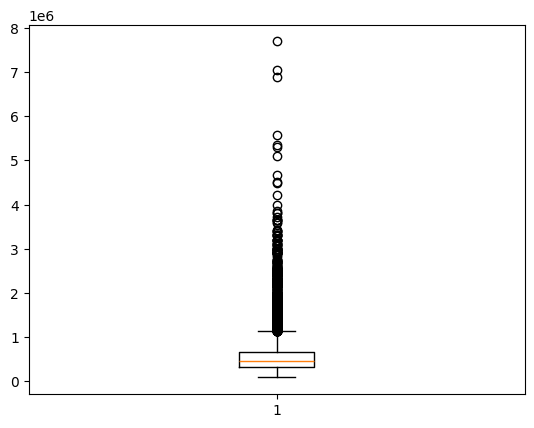

In [35]:
plt.boxplot(data["Sale Price"])
plt.show()

handlin outliers 

In [36]:
def outliers(value):
    
    if value > upper_bound:
        return upper_bound
    elif value <lower_bound:
        return lower_bound
    else:
        return value
    
    
data["Sale Price"]=data["Sale Price"].map(outliers)

In [37]:
data["Sale Price"].max()

np.float64(1129743.75)

In [38]:
data=pd.get_dummies(data,columns=["Waterfront View","Condition of the House","Luxary","Zipcode_y"], drop_first=True)

In [39]:
data.drop(columns=["Renovated Year","Date House was Sold","Zipcode","ID"],inplace=True)


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21608 non-null  float64
 1   No of Bedrooms                             21608 non-null  int64  
 2   No of Bathrooms                            21608 non-null  float64
 3   Flat Area (in Sqft)                        21608 non-null  float64
 4   Lot Area (in Sqft)                         21608 non-null  float64
 5   No of Floors                               21608 non-null  float64
 6   Overall Grade                              21608 non-null  int64  
 7   Area of the House from Basement (in Sqft)  21608 non-null  float64
 8   Basement Area (in Sqft)                    21608 non-null  int64  
 9   Age of House (in Years)                    21608 non-null  int64  
 10  Latitude                   

In [41]:
data.head(3)

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Luxary_Yes,Zipcode_y_zipcode_group_1,Zipcode_y_zipcode_group_2,Zipcode_y_zipcode_group_3,Zipcode_y_zipcode_group_4,Zipcode_y_zipcode_group_5,Zipcode_y_zipcode_group_6,Zipcode_y_zipcode_group_7,Zipcode_y_zipcode_group_8,Zipcode_y_zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,...,False,False,False,False,False,False,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,...,False,True,False,False,False,False,False,False,False,False
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,...,False,True,False,False,False,False,False,False,False,False


defining X and Y

In [42]:
x1=data.iloc[:,1:]
x=data.iloc[:,1:]
y=data["Sale Price"]

In [43]:
x.head(3)

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Luxary_Yes,Zipcode_y_zipcode_group_1,Zipcode_y_zipcode_group_2,Zipcode_y_zipcode_group_3,Zipcode_y_zipcode_group_4,Zipcode_y_zipcode_group_5,Zipcode_y_zipcode_group_6,Zipcode_y_zipcode_group_7,Zipcode_y_zipcode_group_8,Zipcode_y_zipcode_group_9
0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,47.5112,...,False,False,False,False,False,False,False,False,False,False
1,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,47.7210,...,False,True,False,False,False,False,False,False,False,False
2,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,47.7379,...,False,True,False,False,False,False,False,False,False,False


In [44]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   No of Bedrooms                             21608 non-null  int64  
 1   No of Bathrooms                            21608 non-null  float64
 2   Flat Area (in Sqft)                        21608 non-null  float64
 3   Lot Area (in Sqft)                         21608 non-null  float64
 4   No of Floors                               21608 non-null  float64
 5   Overall Grade                              21608 non-null  int64  
 6   Area of the House from Basement (in Sqft)  21608 non-null  float64
 7   Basement Area (in Sqft)                    21608 non-null  int64  
 8   Age of House (in Years)                    21608 non-null  int64  
 9   Latitude                                   21608 non-null  float64
 10  Longitude                  

Removing skewness 

cheaking correlation 

In [45]:
x=x.drop(columns=[high_corr])

NameError: name 'high_corr' is not defined

In [46]:
x1.isnull().sum()

No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
Year since renovated                         0
Waterfront View_Yes                          0
Condition of the House_Excellent             0
Condition of the House_Fair                  0
Condition of the House_Good                  0
Condition of the House_Okay                  0
Luxary_Yes                                   0
Zipcode_y_zipcode_group_1                    0
Zipcode_y_zip

first model

In [47]:
from sklearn.preprocessing import StandardScaler

scaler1= StandardScaler()

x1=pd.DataFrame(scaler1.fit_transform(x1),columns=x.columns)

In [48]:
from sklearn.model_selection import train_test_split

x1_train,x1_test,y_train,y_test=train_test_split(x1,y,train_size=0.8,random_state=72)

In [49]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()

model1.fit(x1_train,y_train)

model1.score(x1_test,y_test)

0.8241859047632594

In [50]:
pred_1=model1.predict(x1_test)

In [51]:
r2_score(pred_1,y_test)

0.7866664174391967

In [52]:
root_mean_squared_error(pred_1,y_test)

104280.67549255742

second model

In [53]:
from scipy.stats import skew

for i in (x.drop(columns=x.select_dtypes("bool")).columns):
    
    skewness=skew(x[i])
    
    if skewness >0:
        x[i]=np.sqrt(x[i])
    elif skewness <0:
        x[i]=np.square(x[i])

In [54]:
high_corr=[]

for i in x.columns:
    for j in x.columns:
        if i !=j:
            if abs(x[i].corr(x[j])) > 0.90:
                if j not in high_corr:
                    high_corr.append(j)
         
            
high_corr        


[]

In [56]:
x=x.drop(columns=high_corr)

In [57]:
scaler=StandardScaler()

x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.pop("Longitude")

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
21603   NaN
21604   NaN
21605   NaN
21606   NaN
21607   NaN
Name: Longitude, Length: 21608, dtype: float64

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=72)

model=LinearRegression()

model.fit(x_train,y_train)

pred=model.predict(x_test)

In [59]:
model.score(x_train,y_train)

0.8045768540488722

In [60]:
r2_score(pred,y_test)

0.7673727169174708

In [61]:
root_mean_squared_error(pred,y_test)

107844.91386455245